In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import sys
sys.path.append("../")

from bechdelai.processing.video import extract_frames_from_videos
from bechdelai.vision.frame import Frame
from bechdelai.vision.face_detection import FaceDetector

###### Interesting tools
- OpenCV
- Moviepy
- YOLO
- https://github.com/open-mmlab/mmaction2

##### References
- https://www.analyticsvidhya.com/blog/2018/09/deep-learning-video-classification-python/
- https://github.com/HuaizhengZhang/Awsome-Deep-Learning-for-Video-Analysis

# Exploration on first video

In [2]:
path = "../data/sample_videos/Andy Samberg dances on Megatron Man.mp4"

## Frame extraction
- https://www.analyticsvidhya.com/blog/2018/09/deep-learning-video-classification-python/

In [3]:
extract_frames_from_videos(path,"megatron")

ERROR! Session/line number was not unique in database. History logging moved to new session 120
Done!


## Face detection
- https://github.com/opencv/opencv/tree/master/data/haarcascades
- https://www.pyimagesearch.com/2021/04/05/opencv-face-detection-with-haar-cascades/
- https://realpython.com/face-recognition-with-python/

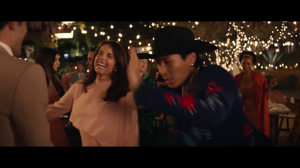

In [6]:
frame = Frame('megatron/frame9.jpg')
frame.resize(width = 300)
frame.show()

In [7]:
detector = FaceDetector()

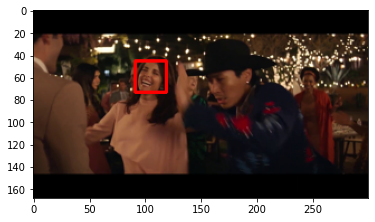

In [8]:
frame.show_faces(detector,scale_factor = 1.1,min_neighbors = 3)

In [9]:
faces = frame.extract_faces(detector,scale_factor = 1.1,min_neighbors = 3)

In [10]:
faces[0]

## All faces extraction

In [11]:
from bechdelai.vision.frames import Frames
from bechdelai.vision.face_detection import FaceDetector

detector = FaceDetector()

In [12]:
frames = Frames(path = "megatron")
frames.resize(width = 600)

  0%|          | 0/84 [00:00<?, ?it/s]

In [13]:
frames.extract_faces(
    detector = detector,
    deepface_check = True,
    scale_factor = 1.3,
    min_neighbors = 3,
    face_size = (100,100),
    deepface_backend = "ssd"
)

  0%|          | 0/84 [00:00<?, ?it/s]

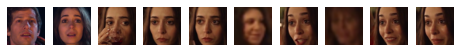

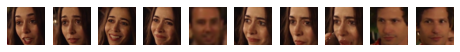

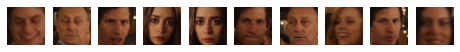

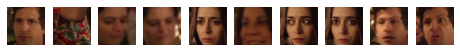

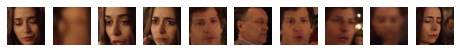

<Figure size 576x72 with 0 Axes>

In [14]:
frames.show_all_faces()

## Test using DeepFace

In [15]:
from deepface import DeepFace

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on

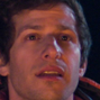

In [16]:
print(frames.faces[0].analyze())
frames.faces[0]

{'emotion': {'angry': 29.655379056930542, 'disgust': 7.990705966949463, 'fear': 26.776614785194397, 'happy': 2.4707090109586716, 'sad': 28.784584999084473, 'surprise': 2.7037257328629494, 'neutral': 1.61827951669693}, 'dominant_emotion': 'angry', 'region': {'x': 8, 'y': 12, 'w': 82, 'h': 82}, 'age': 27, 'gender': 'Woman', 'race': {'asian': 0.026342619094066322, 'indian': 0.052782398415729403, 'black': 0.00160517174663255, 'white': 84.17929410934448, 'middle eastern': 11.001452803611755, 'latino hispanic': 4.738526418805122}, 'dominant_race': 'white'}


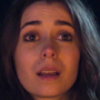

In [17]:
print(frames.faces[1].analyze())
frames.faces[1]

In [18]:
from deepface.basemodels import VGGFace, OpenFace, Facenet, FbDeepFace
from deepface.commons import functions

# https://github.com/serengil/deepface/blob/master/tests/face-recognition-how.py

In [19]:
model = VGGFace.loadModel()
input_shape = model.layers[0].input_shape[0][1:3]
input_shape

(224, 224)

In [20]:
def make_array_dataset(faces,input_shape,enforce_detection = False):
    faces_array = []
    for face in faces:
        face_array = functions.preprocess_face(face.array,input_shape,enforce_detection = False)
        faces_array.append(face_array)
    faces_array = np.concatenate(faces_array,axis = 0)
    return faces_array

In [29]:
faces_array = make_array_dataset(frames.faces,input_shape)

In [31]:
embeddings = model.predict(faces_array)

In [32]:
from umap import UMAP

reducer = UMAP(n_components = 2)

embeddings2D = reducer.fit_transform(embeddings)
embeddings2D = pd.DataFrame(embeddings2D,columns = ["x","y"])

In [33]:
faces_array.shape

(50, 224, 224, 3)

In [34]:
import plotly.express as px
px.scatter(embeddings2D,x = "x",y = "y")


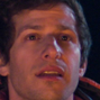
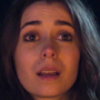
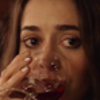
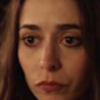
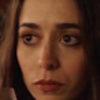
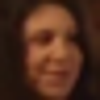
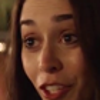
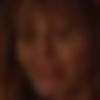
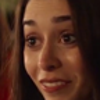
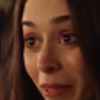
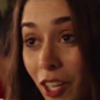
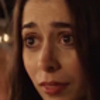
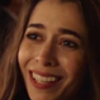
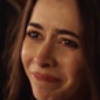
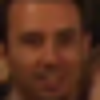
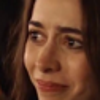
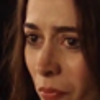
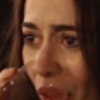
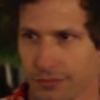
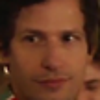
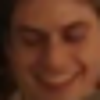
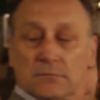
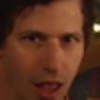
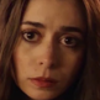
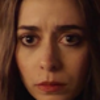
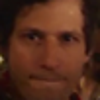
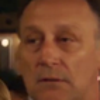
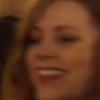
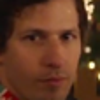
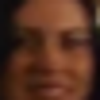
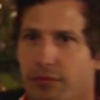
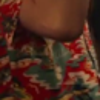
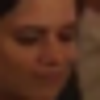
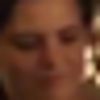
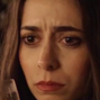
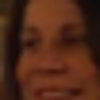
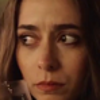
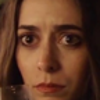
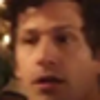
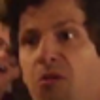
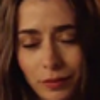
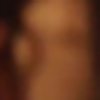
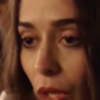
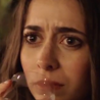
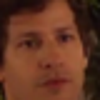
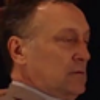
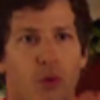
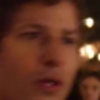
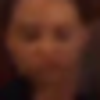
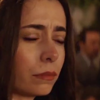

In [36]:
from PIL import Image
import plotly.express as px

fig = px.scatter(
    embeddings2D,
    x="x",
    y="y",
)
# fig.update_traces(marker_color="rgba(0,0,0,0)")

for i, face in enumerate(frames.faces):
    row = embeddings2D.iloc[i]
    fig.add_layout_image(
        dict(
            source=face.img,
            xref="x",
            yref="y",
            xanchor="center",
            yanchor="middle",
            x=row["x"],
            y=row["y"],
            sizex = 0.5,
            sizey = 0.5,
#             sizex=np.sqrt(row["pop"] / df["pop"].max()) * maxi * 0.2 + maxi * 0.05,
#             sizey=np.sqrt(row["pop"] / df["pop"].max()) * maxi * 0.2 + maxi * 0.05,
            sizing="contain",
            opacity=0.8,
            layer="above"
        )
    )

# fig.update_layout(height=600, width=1000,, plot_bgcolor="#dfdfdf")
fig.show()

## Identification with DeepFace

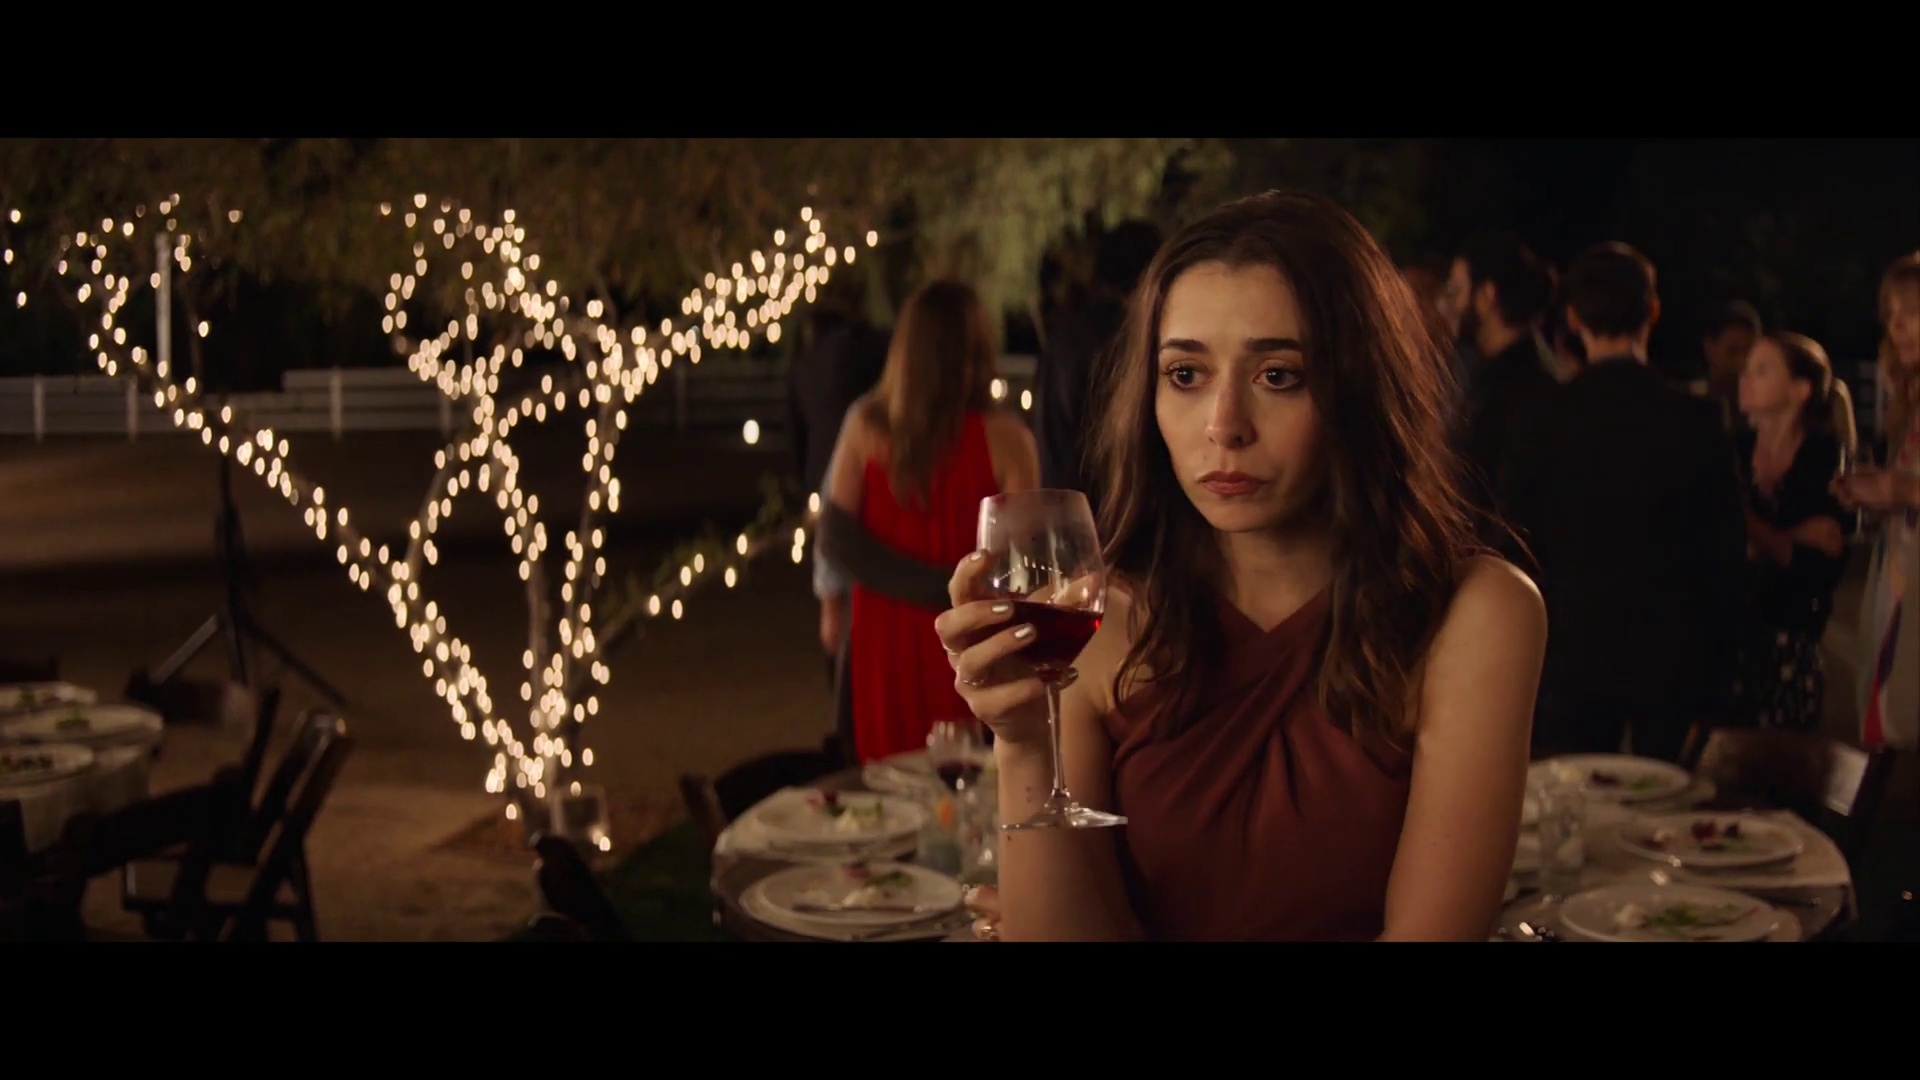

In [37]:
path = "megatron/frame12.jpg"
frame = Frame(path)
Frame(path).show()

In [38]:
frame = Frame("megatron/example.jpg")
frame.resize(width = 1000)

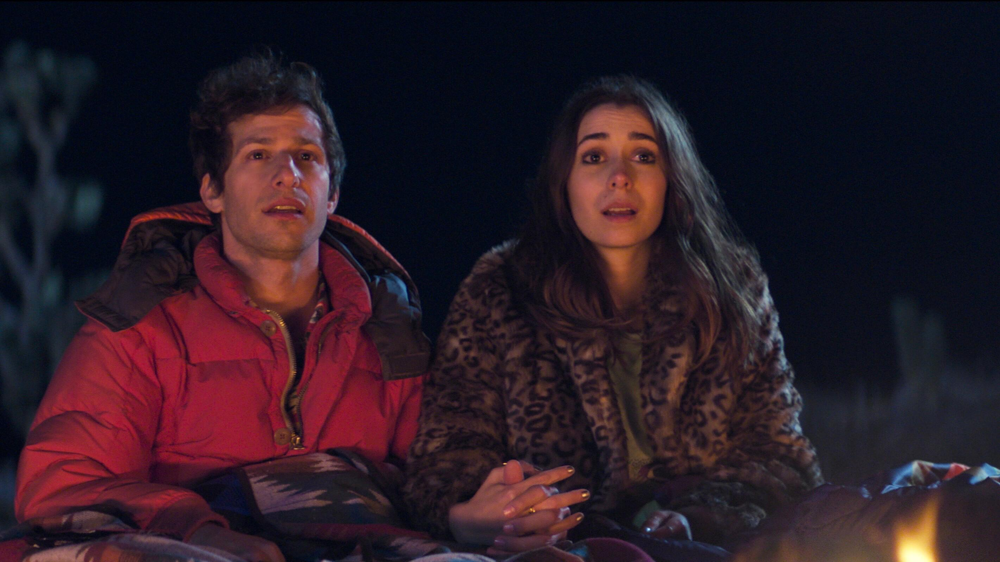

In [39]:
frame

In [40]:
from deepface.detectors import FaceDetector

In [41]:
# https://github.com/serengil/deepface/issues/310
detector_name = "retinaface" #ssd, mtcnn, dlib, retinaface
detector = FaceDetector.build_model(detector_name)

In [42]:
x = FaceDetector.detect_faces(detector, detector_name, frame.array)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


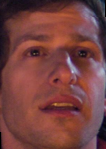

In [43]:
x1 = Frame(array = x[0][0])
x1

In [44]:
x1.array

array([[[ 25,  19,  27],
        [ 27,  19,  27],
        [ 28,  19,  26],
        ...,
        [ 21,  37,  52],
        [ 10,  23,  38],
        [  0,   0,   0]],

       [[ 25,  19,  26],
        [ 26,  16,  25],
        [ 29,  17,  25],
        ...,
        [ 25,  42,  61],
        [  9,  24,  42],
        [  0,   0,   0]],

       [[ 22,  16,  24],
        [ 28,  16,  25],
        [ 36,  22,  31],
        ...,
        [ 31,  51,  74],
        [ 16,  34,  55],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [ 48,  21,  33],
        [ 88,  46,  55],
        ...,
        [ 77,  18,  37],
        [ 84,  25,  41],
        [ 82,  26,  37]],

       [[  0,   0,   0],
        [ 44,  19,  31],
        [ 81,  41,  50],
        ...,
        [ 77,  18,  35],
        [ 87,  21,  40],
        [ 95,  20,  42]],

       [[  0,   0,   0],
        [ 41,  17,  30],
        [ 74,  35,  46],
        ...,
        [ 80,  20,  36],
        [ 92,  22,  42],
        [105,  19,  44]]

In [45]:
DeepFace.find(x1.array,db_path = "./db",enforce_detection = False)

There are  6  representations found in  representations_vgg_face.pkl
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
find function lasts  2.515838146209717  seconds


identity  VGG-Face_cosine
0  ./db\andy_samberg/Andy-samberg-premiere-that-s...         0.310495
1                 ./db\andy_samberg/Andy_Samberg.png         0.318600
2  ./db\andy_samberg/MV5BNDg3NDk3ODI0Ml5BMl5BanBn...         0.353255

In [46]:
from retinaface import RetinaFace

In [47]:
faces = RetinaFace.extract_faces(frame.array)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


## Approach 1 - supervised approach